In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("tourist_accommodation_03112025_clean.csv")
data.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,is_valid,ocupacion_mes
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2,1.0,...,10.0,10.0,10.0,0,0.406532,Spain,Málaga,2018-07-31,True,23
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,Cármenes,Latina,Private room,1,1,1.0,...,10.0,8.0,9.0,0,0.244807,Spain,Madrid,2020-10-01,True,30
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2.0,...,10.0,10.0,10.0,1,0.837420,Spain,Sevilla,2019-07-29,True,4
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,L'Antiga Esquerra De L'Eixample,Eixample,Private room,2,2,1.0,...,10.0,10.0,9.0,1,1.757272,Spain,Barcelona,2020-10-01,True,21
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1,2.0,...,10.0,10.0,10.0,0,0.207533,Spain,Girona,2019-02-19,True,30
5,48764,18th C Stone House near Costa Brava,Casa Fluvia is a charming stone village house ...,220145,Torroella De Fluvià,NaN,Entire home/apt,8,2,4.0,...,10.0,9.0,10.0,0,0.140792,Spain,Girona,2019-02-19,True,30
6,58512,Stylish & cozy 3BR near Sagrada Familia,Welcome to my home!<br /><br />My lovely 3 bed...,280070,El Camp De L'Arpa Del Clot,Sant Martí,Entire home/apt,6,2,3.0,...,9.0,9.0,9.0,1,2.200883,Spain,Barcelona,2020-12-10,True,0
7,71603,PENTHOUSE1 BEST PRICE 15/21.07 PROMO LAST MINUTE!,The apartment you are about to book has everyt...,366654,La Dreta De L'Eixample,Eixample,Entire home/apt,3,2,1.0,...,9.0,10.0,9.0,0,0.184152,Spain,Barcelona,2017-06-07,True,2
8,72150,Sunny attic duplex flat with terrace next to Sol,"The apartment is a quiet, secluded idyll in th...",364585,Embajadores,Centro,Entire home/apt,5,2,3.0,...,10.0,10.0,9.0,0,0.602342,Spain,Madrid,2020-06-11,True,1
9,73683,Sagrada Familia area for 12 people,"An ideal location for a big group, two apartme...",135703,El Camp D'En Grassot I Gràcia Nova,Gràcia,Entire home/apt,12,2,4.0,...,10.0,9.0,9.0,1,0.675803,Spain,Barcelona,2018-09-06,True,22


In [3]:
mark_data = data[["amenities_list","review_scores_location", "accommodates" ,"price", "city"]]
mark_data

,amenities_list,review_scores_location,accommodates,price,city
0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",10.0,2,400.0,Málaga
1,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",8.0,1,170.0,Madrid
2,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",10.0,4,990.0,Sevilla
3,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",10.0,2,400.0,Barcelona
4,"Wifi,Pool,Free parking on premises,Breakfast,P...",10.0,5,900.0,Girona
...,...,...,...,...,...
7529,"TV,Wifi,Elevator,Heating,Washer,Essentials,Sha...",0.0,1,3000.0,Barcelona
7530,"Patio or balcony, Long term stays allowed, Sha...",10.0,6,2090.0,Sevilla
7531,"Air conditioning,Pool,Kitchen,Free parking on ...",0.0,2,930.0,Mallorca
7532,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",10.0,3,960.0,Barcelona


In [4]:
mark_data_decode = mark_data['amenities_list'].str.split(pat=",", expand=True)
mark_data_decode

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,TV,Internet,Wifi,Air conditioning,Elevator,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,...,None,None,None,None,None,None,None,None,None,None
1,TV,Internet,Wifi,Air conditioning,Kitchen,Free parking on premises,Doorman,Elevator,Heating,Washer,...,None,None,None,None,None,None,None,None,None,None
2,TV,Internet,Wifi,Air conditioning,Wheelchair accessible,Kitchen,Elevator,Buzzer/wireless intercom,Heating,Washer,...,None,None,None,None,None,None,None,None,None,None
3,TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Buzzer/wireless intercom,Heating,Washer,Essentials,...,None,None,None,None,None,None,None,None,None,None
4,Wifi,Pool,Free parking on premises,Breakfast,Pets live on this property,Dog(s),Cat(s),Other pet(s),Hot tub,Indoor fireplace,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7529,TV,Wifi,Elevator,Heating,Washer,Essentials,Shampoo,Lock on bedroom door,Hair dryer,Iron,...,None,None,None,None,None,None,None,None,None,None
7530,Patio or balcony,Long term stays allowed,Shampoo,Dedicated workspace,TV,Hot water,First aid kit,Kitchen,Host greets you,Paid parking off premises,...,None,None,None,None,None,None,None,None,None,None
7531,Air conditioning,Pool,Kitchen,Free parking on premises,Heating,Family/kid friendly,Iron,Microwave,Coffee maker,None,...,None,None,None,None,None,None,None,None,None,None
7532,TV,Wifi,Air conditioning,Kitchen,Free parking on premises,Elevator,Heating,Family/kid friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None


In [5]:
mark_data_decode.values

array([['TV', 'Internet', 'Wifi', ..., None, None, None],
       ['TV', 'Internet', 'Wifi', ..., None, None, None],
       ['TV', 'Internet', 'Wifi', ..., None, None, None],
       ...,
       ['Air conditioning', 'Pool', 'Kitchen', ..., None, None, None],
       ['TV', 'Wifi', 'Air conditioning', ..., None, None, None],
       ['TV', 'Kitchen', 'Pets allowed', ..., None, None, None]],
      dtype=object)

In [6]:
mark_data_encoded = pd.get_dummies(mark_data_decode,) 
mark_data_encoded

,0_Air conditioning,0_BBQ grill,0_Baby bath,0_Babysitter recommendations,0_Baking sheet,0_Barbecue utensils,0_Bathtub,0_Beachfront,0_Bed linens,0_Bedroom comforts,...,89_Memory foam mattress,90_En suite bathroom,91_Outdoor seating,92_Mudroom,93_Full kitchen,94_Paid parking on premises,95_Bedroom comforts,96_Bathroom essentials,97_Fixed grab bars for shower,98_Shower chair
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7531,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mark_data_encoded.shape

(7534, 7215)

In [8]:
for i in mark_data_encoded.columns:
    print(i)

0_Air conditioning
0_BBQ grill
0_Baby bath
0_Babysitter recommendations
0_Baking sheet
0_Barbecue utensils
0_Bathtub
0_Beachfront
0_Bed linens
0_Bedroom comforts
0_Breakfast
0_Building staff
0_Buzzer/wireless intercom
0_Cable TV
0_Carbon monoxide alarm
0_Changing table
0_Childrenu2019s dinnerware
0_Coffee maker
0_Conditioner
0_Cooking basics
0_Crib
0_Dedicated workspace
0_Dishes and silverware
0_Dishwasher
0_Dryer
0_Elevator
0_Elevator in building
0_Essentials
0_Extra pillows and blankets
0_Family/kid friendly
0_Fire extinguisher
0_First aid kit
0_Free parking on premises
0_Free street parking
0_Freezer
0_Garden or backyard
0_Hair dryer
0_Hangers
0_Heating
0_High chair
0_Host greets you
0_Hot tub
0_Hot water
0_Indoor fireplace
0_Internet
0_Iron
0_Keypad
0_Kitchen
0_Laptop friendly workspace
0_Laptop-friendly workspace
0_Lock on bedroom door
0_Lockbox
0_Long term stays allowed
0_Long term stays allowed]
0_Luggage dropoff allowed
0_Microwave
0_Outlet covers
0_Oven
0_Pack u2019n Play/trav

In [9]:
import re

def clean_column_names(df):
    """
    Clean pandas column names by:
    1. Removing numeric prefixes (0_, 1_, 2_, etc.)
    2. Removing special characters and brackets
    3. Handling translation missing entries
    4. Standardizing naming convention
    """
    cleaned_columns = []
    
    for col in df.columns:
        # Remove numeric prefixes (0_, 1_, 2_, etc.)
        cleaned = re.sub(r'^\d+_', '', col)
        
        # Remove trailing brackets and special characters
        cleaned = re.sub(r'[\[\]\]]', '', cleaned)
        
        # Handle translation missing entries
        if 'translation missing' in cleaned:
            # Extract the amenity number and create a standard name
            match = re.search(r'hosting_amenity_(\d+)', cleaned)
            if match:
                cleaned = f'amenity_{match.group(1)}'
            else:
                cleaned = 'unknown_amenity'
        
        # Replace special characters and u2019 (right single quote) with underscores
        cleaned = re.sub(r'[\/\\\u2019\s\-]', '_', cleaned)
        cleaned = re.sub(r'u2019',"'", cleaned)
        
        # Remove multiple consecutive underscores
        cleaned = re.sub(r'_+', '_', cleaned)

        #Replace � to "'"
        cleaned = re.sub(r'�', "'", cleaned)
        
        # Remove leading/trailing underscores
        cleaned = cleaned.strip('_')
        
        # Convert to lowercase
        cleaned = cleaned.lower()
        
        cleaned_columns.append(cleaned)
    
    return cleaned_columns




In [10]:
# Apply the cleaning to your DataFrame
mark_data_encoded.columns = clean_column_names(mark_data_encoded)

In [11]:
mark_data_encoded

,air_conditioning,bbq_grill,baby_bath,babysitter_recommendations,baking_sheet,barbecue_utensils,bathtub,beachfront,bed_linens,bedroom_comforts,...,memory_foam_mattress,en_suite_bathroom,outdoor_seating,mudroom,full_kitchen,paid_parking_on_premises,bedroom_comforts,bathroom_essentials,fixed_grab_bars_for_shower,shower_chair
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7531,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
mark_data_group= mark_data_encoded.groupby(by=mark_data_encoded.columns, axis=1 ).sum() 


In [13]:
full_data = pd.concat([mark_data, mark_data_group], axis=1) 
full_data
   

,amenities_list,review_scores_location,accommodates,price,city,,24_hour_check_in,40_hdtv,43_hdtv_with_netflix,accessible_height_bed,...,wide_entrance,wide_entrance_for_guests,wide_entryway,wide_hallway_clearance,wide_hallways,wifi,wifi_u2013_100_mbps,window_guards,wine_glasses,wireless_internet
0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",10.0,2,400.0,Málaga,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",8.0,1,170.0,Madrid,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",10.0,4,990.0,Sevilla,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",10.0,2,400.0,Barcelona,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,"Wifi,Pool,Free parking on premises,Breakfast,P...",10.0,5,900.0,Girona,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7529,"TV,Wifi,Elevator,Heating,Washer,Essentials,Sha...",0.0,1,3000.0,Barcelona,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7530,"Patio or balcony, Long term stays allowed, Sha...",10.0,6,2090.0,Sevilla,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7531,"Air conditioning,Pool,Kitchen,Free parking on ...",0.0,2,930.0,Mallorca,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7532,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",10.0,3,960.0,Barcelona,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [14]:
full_data=full_data.drop(["amenities_list",""], axis=1)
full_data

,review_scores_location,accommodates,price,city,24_hour_check_in,40_hdtv,43_hdtv_with_netflix,accessible_height_bed,accessible_height_toilet,air_conditioning,...,wide_entrance,wide_entrance_for_guests,wide_entryway,wide_hallway_clearance,wide_hallways,wifi,wifi_u2013_100_mbps,window_guards,wine_glasses,wireless_internet
0,10.0,2,400.0,Málaga,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,8.0,1,170.0,Madrid,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,10.0,4,990.0,Sevilla,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,10.0,2,400.0,Barcelona,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,10.0,5,900.0,Girona,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7529,0.0,1,3000.0,Barcelona,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7530,10.0,6,2090.0,Sevilla,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7531,0.0,2,930.0,Mallorca,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7532,10.0,3,960.0,Barcelona,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


### Separamos el dataframe por ciudades

In [16]:
ciudades = list(dict.fromkeys(full_data["city"].values ))
print(ciudades)

['Málaga', 'Madrid', 'Sevilla', 'Barcelona', 'Girona', 'Valencia', 'Mallorca', 'Menorca']


In [17]:
for x in ciudades:
    exec(f"data_{x} = full_data[full_data['city']== x].copy()")


### Feature importance

Random Forest Regression Feature Importance

#### Málaga

In [21]:
X = data_Málaga.drop(["price","city"], axis=1) 
y = data_Málaga["price"]

In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
model.fit(X,y)

RandomForestRegressor(random_state=42)

In [24]:
importance = model.feature_importances_

In [25]:
filtered_index = []
for i,v in enumerate(importance):
    if v > 0.01:
        filtered_index.append(i)
        print("Feature: %0d, Score: %.3f " % (i,v) + "Column: " + X.columns[i])

Feature: 0, Score: 0.032 Column: review_scores_location
Feature: 1, Score: 0.265 Column: accommodates
Feature: 7, Score: 0.030 Column: air_conditioning
Feature: 9, Score: 0.012 Column: amenity_49
Feature: 25, Score: 0.011 Column: beachfront
Feature: 34, Score: 0.016 Column: building_staff
Feature: 35, Score: 0.011 Column: buzzer_wireless_intercom
Feature: 65, Score: 0.028 Column: dryer
Feature: 82, Score: 0.015 Column: fire_extinguisher
Feature: 100, Score: 0.011 Column: game_console
Feature: 101, Score: 0.017 Column: garden_or_backyard
Feature: 112, Score: 0.016 Column: heating
Feature: 123, Score: 0.016 Column: kitchen
Feature: 129, Score: 0.028 Column: lockbox
Feature: 160, Score: 0.051 Column: pool
Feature: 167, Score: 0.017 Column: private_entrance
Feature: 168, Score: 0.025 Column: private_living_room
Feature: 176, Score: 0.013 Column: safety_card
Feature: 178, Score: 0.017 Column: shampoo
Feature: 202, Score: 0.011 Column: stove
Feature: 212, Score: 0.038 Column: tv


<Axes: >

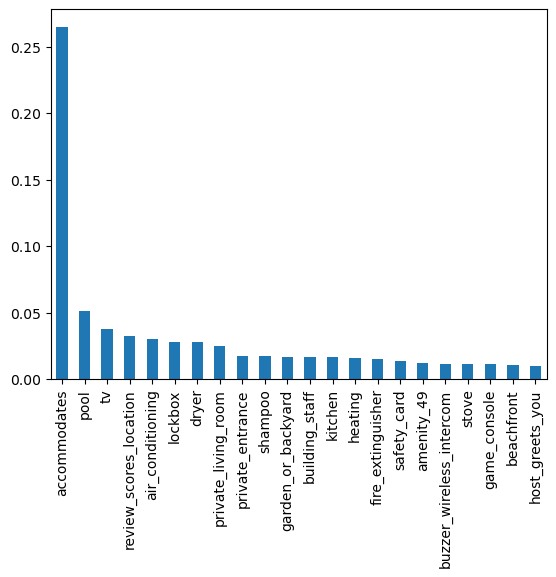

In [26]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='bar'))

In [27]:
malaga = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)*100
malaga

accommodates              26.481412
pool                       5.086632
tv                         3.776845
review_scores_location     3.217187
air_conditioning           2.979412
lockbox                    2.792831
dryer                      2.766823
private_living_room        2.504201
private_entrance           1.733041
shampoo                    1.717497
dtype: float64

In [28]:
malaga = malaga.to_frame().reset_index().rename(columns={"index":"ammenities", 0: "score"})
malaga["city"] = "Málaga" 
malaga

,ammenities,score,city
0,accommodates,26.481412,Málaga
1,pool,5.086632,Málaga
2,tv,3.776845,Málaga
3,review_scores_location,3.217187,Málaga
4,air_conditioning,2.979412,Málaga
5,lockbox,2.792831,Málaga
6,dryer,2.766823,Málaga
7,private_living_room,2.504201,Málaga
8,private_entrance,1.733041,Málaga
9,shampoo,1.717497,Málaga


In [29]:
malaga.to_csv("malaga.csv")

#### Madrid

In [31]:
X = data_Madrid.drop(["price","city"], axis=1) 
y = data_Madrid["price"]

In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [33]:
model.fit(X,y)

RandomForestRegressor(random_state=42)

In [34]:
importance = model.feature_importances_

In [35]:
filtered_index = []
for i,v in enumerate(importance):
    if v > 0.01:
        filtered_index.append(i)
        print("Feature: %0d, Score: %.3f " % (i,v) + "Column: " + X.columns[i])

Feature: 0, Score: 0.047 Column: review_scores_location
Feature: 1, Score: 0.300 Column: accommodates
Feature: 7, Score: 0.012 Column: air_conditioning
Feature: 36, Score: 0.015 Column: cable_tv
Feature: 54, Score: 0.025 Column: crib
Feature: 65, Score: 0.022 Column: dryer
Feature: 70, Score: 0.012 Column: elevator
Feature: 81, Score: 0.012 Column: family_kid_friendly
Feature: 82, Score: 0.012 Column: fire_extinguisher
Feature: 112, Score: 0.020 Column: heating
Feature: 119, Score: 0.010 Column: indoor_fireplace
Feature: 120, Score: 0.017 Column: internet
Feature: 126, Score: 0.032 Column: laptop_friendly_workspace
Feature: 130, Score: 0.010 Column: long_term_stays_allowed
Feature: 175, Score: 0.033 Column: room_darkening_shades
Feature: 178, Score: 0.012 Column: shampoo
Feature: 190, Score: 0.019 Column: smoking_allowed
Feature: 215, Score: 0.012 Column: washer


<Axes: >

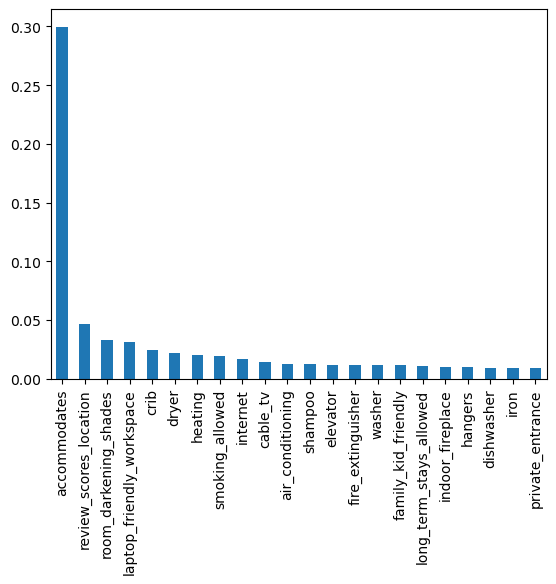

In [36]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='bar'))

In [37]:
madrid = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)*100
madrid

accommodates                 29.984881
review_scores_location        4.651126
room_darkening_shades         3.316151
laptop_friendly_workspace     3.159890
crib                          2.475522
dryer                         2.215395
heating                       1.997221
smoking_allowed               1.894122
internet                      1.694752
cable_tv                      1.452888
dtype: float64

In [38]:
madrid = madrid.to_frame().reset_index().rename(columns={"index":"ammenities", 0: "score"})
madrid["city"] = "Madrid" 
madrid

,ammenities,score,city
0,accommodates,29.984881,Madrid
1,review_scores_location,4.651126,Madrid
2,room_darkening_shades,3.316151,Madrid
3,laptop_friendly_workspace,3.159890,Madrid
4,crib,2.475522,Madrid
5,dryer,2.215395,Madrid
6,heating,1.997221,Madrid
7,smoking_allowed,1.894122,Madrid
8,internet,1.694752,Madrid
9,cable_tv,1.452888,Madrid


#### Sevilla

In [40]:
X = data_Sevilla.drop(["price","city"], axis=1) 
y = data_Sevilla["price"]

In [41]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [42]:
model.fit(X,y)

RandomForestRegressor(random_state=42)

In [43]:
importance = model.feature_importances_

In [44]:
filtered_index = []
for i,v in enumerate(importance):
    if v > 0.01:
        filtered_index.append(i)
        print("Feature: %0d, Score: %.3f " % (i,v) + "Column: " + X.columns[i])

Feature: 0, Score: 0.078 Column: review_scores_location
Feature: 1, Score: 0.179 Column: accommodates
Feature: 2, Score: 0.014 Column: 24_hour_check_in
Feature: 10, Score: 0.014 Column: amenity_50
Feature: 26, Score: 0.010 Column: bed_linens
Feature: 53, Score: 0.017 Column: cooking_basics
Feature: 54, Score: 0.024 Column: crib
Feature: 81, Score: 0.018 Column: family_kid_friendly
Feature: 82, Score: 0.026 Column: fire_extinguisher
Feature: 85, Score: 0.027 Column: first_aid_kit
Feature: 94, Score: 0.019 Column: free_parking_on_premises
Feature: 96, Score: 0.045 Column: free_street_parking
Feature: 104, Score: 0.014 Column: gym
Feature: 105, Score: 0.021 Column: hair_dryer
Feature: 107, Score: 0.020 Column: handheld_shower_head
Feature: 108, Score: 0.013 Column: hangers
Feature: 112, Score: 0.011 Column: heating
Feature: 113, Score: 0.035 Column: high_chair
Feature: 116, Score: 0.020 Column: hot_water
Feature: 121, Score: 0.013 Column: iron
Feature: 122, Score: 0.017 Column: keypad
Fea

<Axes: >

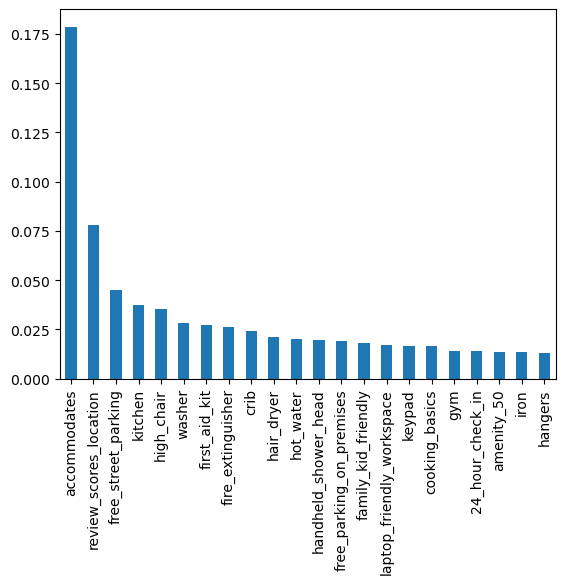

In [45]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='bar'))

In [46]:
sevilla = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)*100
sevilla

accommodates              17.873207
review_scores_location     7.814674
free_street_parking        4.525472
kitchen                    3.743071
high_chair                 3.547227
washer                     2.824495
first_aid_kit              2.702073
fire_extinguisher          2.641921
crib                       2.416932
hair_dryer                 2.103562
dtype: float64

In [47]:
sevilla = sevilla.to_frame().reset_index().rename(columns={"index":"ammenities", 0: "score"})
sevilla["city"] = "Sevilla" 
sevilla

,ammenities,score,city
0,accommodates,17.873207,Sevilla
1,review_scores_location,7.814674,Sevilla
2,free_street_parking,4.525472,Sevilla
3,kitchen,3.743071,Sevilla
4,high_chair,3.547227,Sevilla
5,washer,2.824495,Sevilla
6,first_aid_kit,2.702073,Sevilla
7,fire_extinguisher,2.641921,Sevilla
8,crib,2.416932,Sevilla
9,hair_dryer,2.103562,Sevilla


#### Barcelona

In [49]:
X = data_Barcelona.drop(["price","city"], axis=1) 
y = data_Barcelona["price"]

In [50]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [51]:
model.fit(X,y)

RandomForestRegressor(random_state=42)

In [52]:
importance = model.feature_importances_

In [53]:
filtered_index = []
for i,v in enumerate(importance):
    if v > 0.01:
        filtered_index.append(i)
        print("Feature: %0d, Score: %.3f " % (i,v) + "Column: " + X.columns[i])

Feature: 0, Score: 0.036 Column: review_scores_location
Feature: 1, Score: 0.401 Column: accommodates
Feature: 2, Score: 0.018 Column: 24_hour_check_in
Feature: 7, Score: 0.019 Column: air_conditioning
Feature: 36, Score: 0.010 Column: cable_tv
Feature: 70, Score: 0.012 Column: elevator
Feature: 81, Score: 0.037 Column: family_kid_friendly
Feature: 112, Score: 0.012 Column: heating
Feature: 120, Score: 0.012 Column: internet
Feature: 126, Score: 0.012 Column: laptop_friendly_workspace
Feature: 131, Score: 0.011 Column: luggage_dropoff_allowed
Feature: 155, Score: 0.012 Column: patio_or_balcony
Feature: 160, Score: 0.011 Column: pool
Feature: 176, Score: 0.024 Column: safety_card
Feature: 178, Score: 0.015 Column: shampoo


<Axes: >

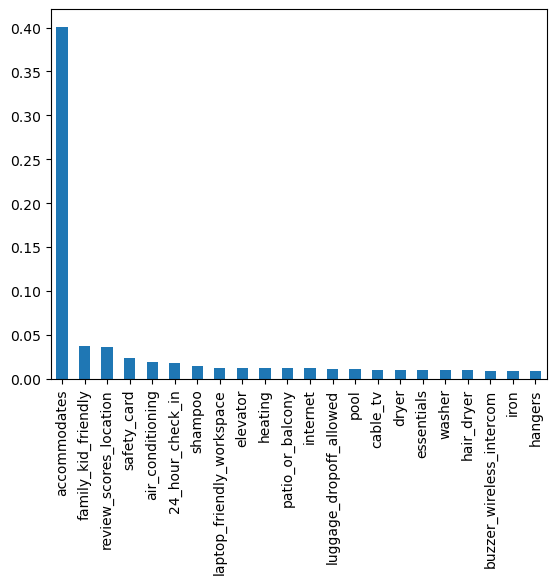

In [54]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='bar'))

In [55]:
barcelona = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)*100
barcelona

accommodates                 40.107864
family_kid_friendly           3.682574
review_scores_location        3.595209
safety_card                   2.394320
air_conditioning              1.874720
24_hour_check_in              1.780203
shampoo                       1.453868
laptop_friendly_workspace     1.239716
elevator                      1.231330
heating                       1.196334
dtype: float64

In [56]:
barcelona = barcelona.to_frame().reset_index().rename(columns={"index":"ammenities", 0: "score"})
barcelona["city"] = "Barcelona" 
barcelona

,ammenities,score,city
0,accommodates,40.107864,Barcelona
1,family_kid_friendly,3.682574,Barcelona
2,review_scores_location,3.595209,Barcelona
3,safety_card,2.394320,Barcelona
4,air_conditioning,1.874720,Barcelona
5,24_hour_check_in,1.780203,Barcelona
6,shampoo,1.453868,Barcelona
7,laptop_friendly_workspace,1.239716,Barcelona
8,elevator,1.231330,Barcelona
9,heating,1.196334,Barcelona


#### Girona

In [58]:
X = data_Girona.drop(["price","city"], axis=1) 
y = data_Girona["price"]

In [59]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [60]:
model.fit(X,y)

RandomForestRegressor(random_state=42)

In [61]:
importance = model.feature_importances_

In [62]:
filtered_index = []
for i,v in enumerate(importance):
    if v > 0.01:
        filtered_index.append(i)
        print("Feature: %0d, Score: %.3f " % (i,v) + "Column: " + X.columns[i])

Feature: 0, Score: 0.036 Column: review_scores_location
Feature: 1, Score: 0.361 Column: accommodates
Feature: 7, Score: 0.013 Column: air_conditioning
Feature: 65, Score: 0.025 Column: dryer
Feature: 70, Score: 0.014 Column: elevator
Feature: 101, Score: 0.010 Column: garden_or_backyard
Feature: 108, Score: 0.011 Column: hangers
Feature: 112, Score: 0.012 Column: heating
Feature: 119, Score: 0.030 Column: indoor_fireplace
Feature: 126, Score: 0.012 Column: laptop_friendly_workspace
Feature: 156, Score: 0.015 Column: pets_allowed
Feature: 160, Score: 0.045 Column: pool
Feature: 167, Score: 0.013 Column: private_entrance
Feature: 168, Score: 0.012 Column: private_living_room
Feature: 190, Score: 0.011 Column: smoking_allowed
Feature: 212, Score: 0.017 Column: tv


<Axes: >

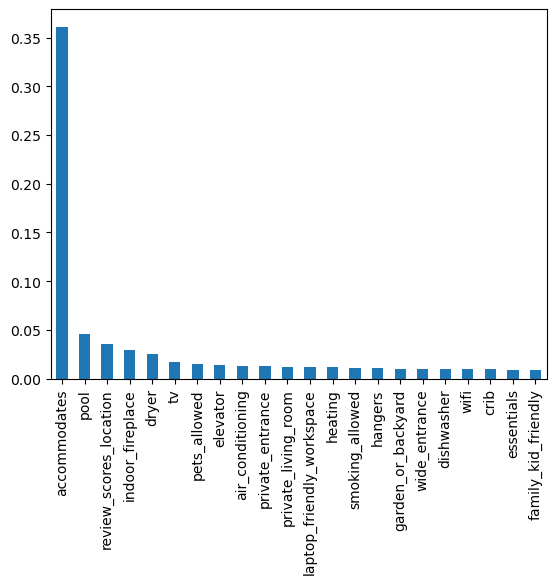

In [63]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='bar'))

In [64]:
girona = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)*100
girona

accommodates              36.116357
pool                       4.538190
review_scores_location     3.586543
indoor_fireplace           2.965681
dryer                      2.482174
tv                         1.686224
pets_allowed               1.480948
elevator                   1.441572
air_conditioning           1.293227
private_entrance           1.256238
dtype: float64

In [65]:
girona = girona.to_frame().reset_index().rename(columns={"index":"ammenities", 0: "score"})
girona["city"] = "Girona" 
girona

,ammenities,score,city
0,accommodates,36.116357,Girona
1,pool,4.538190,Girona
2,review_scores_location,3.586543,Girona
3,indoor_fireplace,2.965681,Girona
4,dryer,2.482174,Girona
5,tv,1.686224,Girona
6,pets_allowed,1.480948,Girona
7,elevator,1.441572,Girona
8,air_conditioning,1.293227,Girona
9,private_entrance,1.256238,Girona


#### Valencia

In [67]:
X = data_Valencia.drop(["price","city"], axis=1) 
y = data_Valencia["price"]

In [68]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [69]:
model.fit(X,y)

RandomForestRegressor(random_state=42)

In [70]:
importance = model.feature_importances_

In [71]:
filtered_index = []
for i,v in enumerate(importance):
    if v > 0.01:
        filtered_index.append(i)
        print("Feature: %0d, Score: %.3f " % (i,v) + "Column: " + X.columns[i])

Feature: 0, Score: 0.080 Column: review_scores_location
Feature: 1, Score: 0.252 Column: accommodates
Feature: 7, Score: 0.019 Column: air_conditioning
Feature: 26, Score: 0.012 Column: bed_linens
Feature: 60, Score: 0.023 Column: dishwasher
Feature: 65, Score: 0.012 Column: dryer
Feature: 70, Score: 0.023 Column: elevator
Feature: 82, Score: 0.013 Column: fire_extinguisher
Feature: 85, Score: 0.036 Column: first_aid_kit
Feature: 96, Score: 0.030 Column: free_street_parking
Feature: 108, Score: 0.011 Column: hangers
Feature: 116, Score: 0.012 Column: hot_water
Feature: 121, Score: 0.013 Column: iron
Feature: 126, Score: 0.027 Column: laptop_friendly_workspace
Feature: 130, Score: 0.050 Column: long_term_stays_allowed
Feature: 153, Score: 0.012 Column: paid_parking_off_premises
Feature: 154, Score: 0.047 Column: paid_parking_on_premises
Feature: 155, Score: 0.022 Column: patio_or_balcony
Feature: 167, Score: 0.036 Column: private_entrance
Feature: 176, Score: 0.011 Column: safety_card
F

<Axes: >

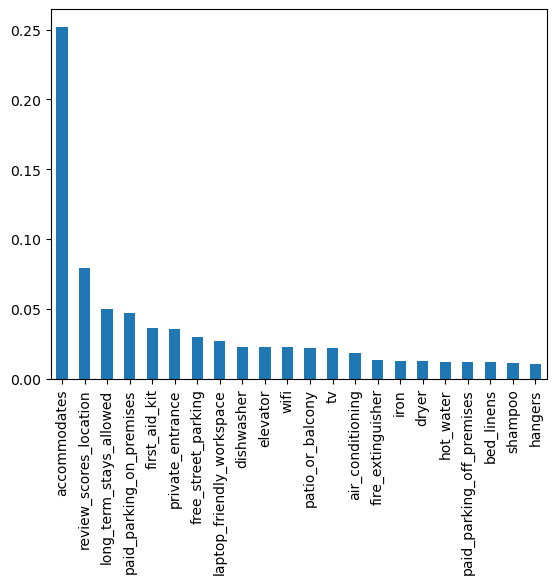

In [72]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='bar'))

In [73]:
valencia = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)*100
valencia

accommodates                 25.207665
review_scores_location        7.957041
long_term_stays_allowed       4.962342
paid_parking_on_premises      4.728919
first_aid_kit                 3.609974
private_entrance              3.579020
free_street_parking           2.999608
laptop_friendly_workspace     2.708007
dishwasher                    2.270347
elevator                      2.264871
dtype: float64

In [74]:
valencia = valencia.to_frame().reset_index().rename(columns={"index":"ammenities", 0: "score"})
valencia["city"] = "Valencia" 
valencia

,ammenities,score,city
0,accommodates,25.207665,Valencia
1,review_scores_location,7.957041,Valencia
2,long_term_stays_allowed,4.962342,Valencia
3,paid_parking_on_premises,4.728919,Valencia
4,first_aid_kit,3.609974,Valencia
5,private_entrance,3.579020,Valencia
6,free_street_parking,2.999608,Valencia
7,laptop_friendly_workspace,2.708007,Valencia
8,dishwasher,2.270347,Valencia
9,elevator,2.264871,Valencia


#### Mallorca

In [76]:
X = data_Mallorca.drop(["price","city"], axis=1) 
y = data_Mallorca["price"]

In [77]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [78]:
model.fit(X,y)

RandomForestRegressor(random_state=42)

In [79]:
importance = model.feature_importances_

In [80]:
filtered_index = []
for i,v in enumerate(importance):
    if v > 0.01:
        filtered_index.append(i)
        print("Feature: %0d, Score: %.3f " % (i,v) + "Column: " + X.columns[i])

Feature: 0, Score: 0.043 Column: review_scores_location
Feature: 1, Score: 0.361 Column: accommodates
Feature: 7, Score: 0.015 Column: air_conditioning
Feature: 25, Score: 0.011 Column: beachfront
Feature: 36, Score: 0.014 Column: cable_tv
Feature: 54, Score: 0.012 Column: crib
Feature: 65, Score: 0.013 Column: dryer
Feature: 81, Score: 0.016 Column: family_kid_friendly
Feature: 94, Score: 0.012 Column: free_parking_on_premises
Feature: 112, Score: 0.014 Column: heating
Feature: 114, Score: 0.010 Column: host_greets_you
Feature: 119, Score: 0.011 Column: indoor_fireplace
Feature: 120, Score: 0.015 Column: internet
Feature: 126, Score: 0.011 Column: laptop_friendly_workspace
Feature: 160, Score: 0.042 Column: pool
Feature: 178, Score: 0.014 Column: shampoo
Feature: 189, Score: 0.010 Column: smoke_detector
Feature: 190, Score: 0.013 Column: smoking_allowed
Feature: 203, Score: 0.012 Column: suitable_for_events


<Axes: >

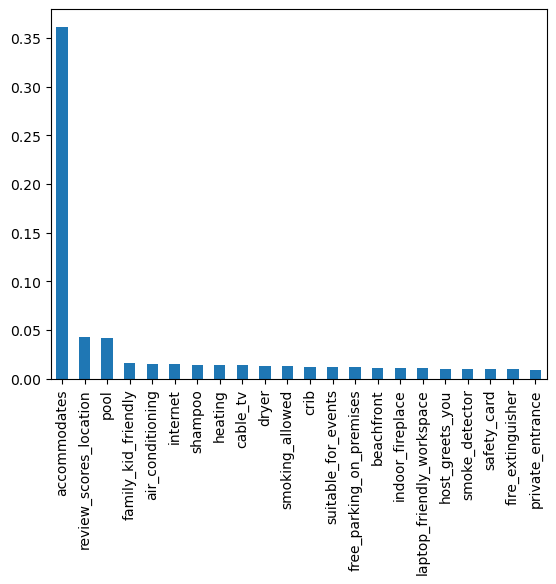

In [81]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='bar'))

In [82]:
mallorca = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)*100
mallorca

accommodates              36.147798
review_scores_location     4.264893
pool                       4.179395
family_kid_friendly        1.592256
air_conditioning           1.463975
internet                   1.457517
shampoo                    1.362502
heating                    1.360395
cable_tv                   1.351848
dryer                      1.332565
dtype: float64

In [83]:
mallorca = mallorca.to_frame().reset_index().rename(columns={"index":"ammenities", 0: "score"})
mallorca["city"] = "Mallorca" 
mallorca

,ammenities,score,city
0,accommodates,36.147798,Mallorca
1,review_scores_location,4.264893,Mallorca
2,pool,4.179395,Mallorca
3,family_kid_friendly,1.592256,Mallorca
4,air_conditioning,1.463975,Mallorca
5,internet,1.457517,Mallorca
6,shampoo,1.362502,Mallorca
7,heating,1.360395,Mallorca
8,cable_tv,1.351848,Mallorca
9,dryer,1.332565,Mallorca


#### Menorca

In [85]:
X = data_Menorca.drop(["price","city"], axis=1) 
y = data_Menorca["price"]

In [86]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [87]:
model.fit(X,y)

RandomForestRegressor(random_state=42)

In [88]:
importance = model.feature_importances_

In [89]:
filtered_index = []
for i,v in enumerate(importance):
    if v > 0.01:
        filtered_index.append(i)
        print("Feature: %0d, Score: %.3f " % (i,v) + "Column: " + X.columns[i])

Feature: 0, Score: 0.045 Column: review_scores_location
Feature: 1, Score: 0.483 Column: accommodates
Feature: 7, Score: 0.011 Column: air_conditioning
Feature: 25, Score: 0.012 Column: beachfront
Feature: 35, Score: 0.023 Column: buzzer_wireless_intercom
Feature: 56, Score: 0.018 Column: dedicated_workspace
Feature: 60, Score: 0.012 Column: dishwasher
Feature: 65, Score: 0.015 Column: dryer
Feature: 74, Score: 0.039 Column: essentials
Feature: 85, Score: 0.023 Column: first_aid_kit
Feature: 96, Score: 0.012 Column: free_street_parking
Feature: 119, Score: 0.015 Column: indoor_fireplace
Feature: 128, Score: 0.014 Column: lock_on_bedroom_door
Feature: 160, Score: 0.014 Column: pool
Feature: 168, Score: 0.013 Column: private_living_room
Feature: 230, Score: 0.020 Column: wifi


<Axes: >

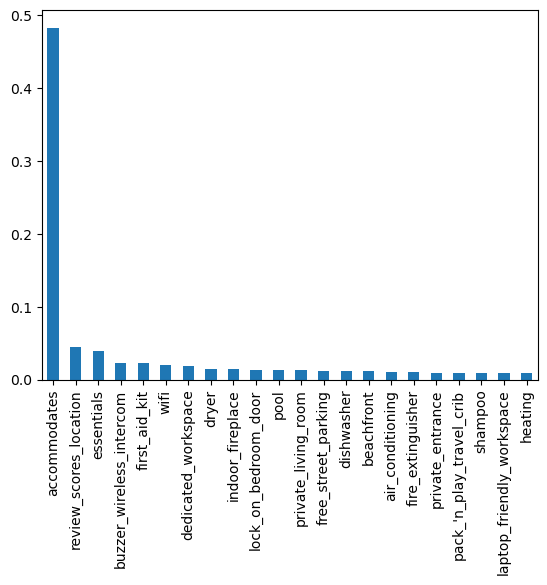

In [90]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(22)
   .plot(kind='bar'))

In [91]:
menorca = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)*100
menorca

accommodates                48.301542
review_scores_location       4.538856
essentials                   3.917627
buzzer_wireless_intercom     2.340040
first_aid_kit                2.256976
wifi                         2.025069
dedicated_workspace          1.823200
dryer                        1.505127
indoor_fireplace             1.473545
lock_on_bedroom_door         1.392979
dtype: float64

In [92]:
menorca = menorca.to_frame().reset_index().rename(columns={"index":"ammenities", 0: "score"})
menorca["city"] = "Menorca" 
menorca

,ammenities,score,city
0,accommodates,48.301542,Menorca
1,review_scores_location,4.538856,Menorca
2,essentials,3.917627,Menorca
3,buzzer_wireless_intercom,2.340040,Menorca
4,first_aid_kit,2.256976,Menorca
5,wifi,2.025069,Menorca
6,dedicated_workspace,1.823200,Menorca
7,dryer,1.505127,Menorca
8,indoor_fireplace,1.473545,Menorca
9,lock_on_bedroom_door,1.392979,Menorca


In [93]:
feature_importance_full = pd.concat([malaga,madrid,sevilla,barcelona,girona,valencia,mallorca,menorca])
feature_importance_full

,ammenities,score,city
0,accommodates,26.481412,Málaga
1,pool,5.086632,Málaga
2,tv,3.776845,Málaga
3,review_scores_location,3.217187,Málaga
4,air_conditioning,2.979412,Málaga
...,...,...,...
5,wifi,2.025069,Menorca
6,dedicated_workspace,1.823200,Menorca
7,dryer,1.505127,Menorca
8,indoor_fireplace,1.473545,Menorca


In [176]:
feature_importance_full.to_csv("marketing_feature_importance_03112025.csv", index=False)